<a href="https://colab.research.google.com/github/nairkarthik02/IndigoHackToHire_DS/blob/main/NLP_Quora_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing Dependancies

In [1]:
pip install datasets pandas numpy matplotlib seaborn nltk transformers torch scikit-learn nltk tokenizer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

#Importing Dataset

In [2]:
from datasets import load_dataset
import pandas as pd

# Load the dataset from the Hugging Face datasets library
dataset = load_dataset("toughdata/quora-question-answer-dataset")
train_data = dataset['train']
train_df = pd.DataFrame(train_data)

print(train_df.head())

train_df.to_csv('quora_question_answer_dataset.csv', index=False)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/56402 [00:00<?, ? examples/s]

                                            question  \
0  Why whenever I get in the shower my girlfriend...   
1            What is a proxy, and how can I use one?   
2  What song has the lyrics "someone left the cak...   
3  I am the owner of an adult website called http...   
4  Does the Bible mention anything about a place ...   

                                              answer  
0  Isn’t it awful? You would swear that there was...  
1  A proxy server is a system or router that prov...  
2                                 MacArthur's Park\n  
3  Don't let apps that are liers put adds on your...  
4  St. John in the book of Revelation mentions an...  


#EDA

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('quora_question_answer_dataset.csv')


print(data.head())


print(data.info())
print(data.describe())

print(data.isnull().sum())




                                            question  \
0  Why whenever I get in the shower my girlfriend...   
1            What is a proxy, and how can I use one?   
2  What song has the lyrics "someone left the cak...   
3  I am the owner of an adult website called http...   
4  Does the Bible mention anything about a place ...   

                                              answer  
0  Isn’t it awful? You would swear that there was...  
1  A proxy server is a system or router that prov...  
2                                 MacArthur's Park\n  
3  Don't let apps that are liers put adds on your...  
4  St. John in the book of Revelation mentions an...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56402 entries, 0 to 56401
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  56402 non-null  object
 1   answer    56402 non-null  object
dtypes: object(2)
memory usage: 881.4+ KB
None
                          

In [4]:
data

,question,answer
0,Why whenever I get in the shower my girlfriend...,Isn’t it awful? You would swear that there was...
1,"What is a proxy, and how can I use one?",A proxy server is a system or router that prov...
2,"What song has the lyrics ""someone left the cak...",MacArthur's Park\n
3,I am the owner of an adult website called http...,Don't let apps that are liers put adds on your...
4,Does the Bible mention anything about a place ...,St. John in the book of Revelation mentions an...
...,...,...
56397,"Alexandria Ocasio-Cortez said ""Going by track ...","I think she’s right, one is a homosexual with ..."
56398,Is becoming a doctor financially worth it?,Yes if you want to help people and eliminate p...
56399,Where can one find the best biryani in bangalore?,Biryani crafts.These guys will give proper aut...
56400,Which smartphone is best for middle class people?,Oneplus nord\n[LINKED_TEXT: https://latesttech...


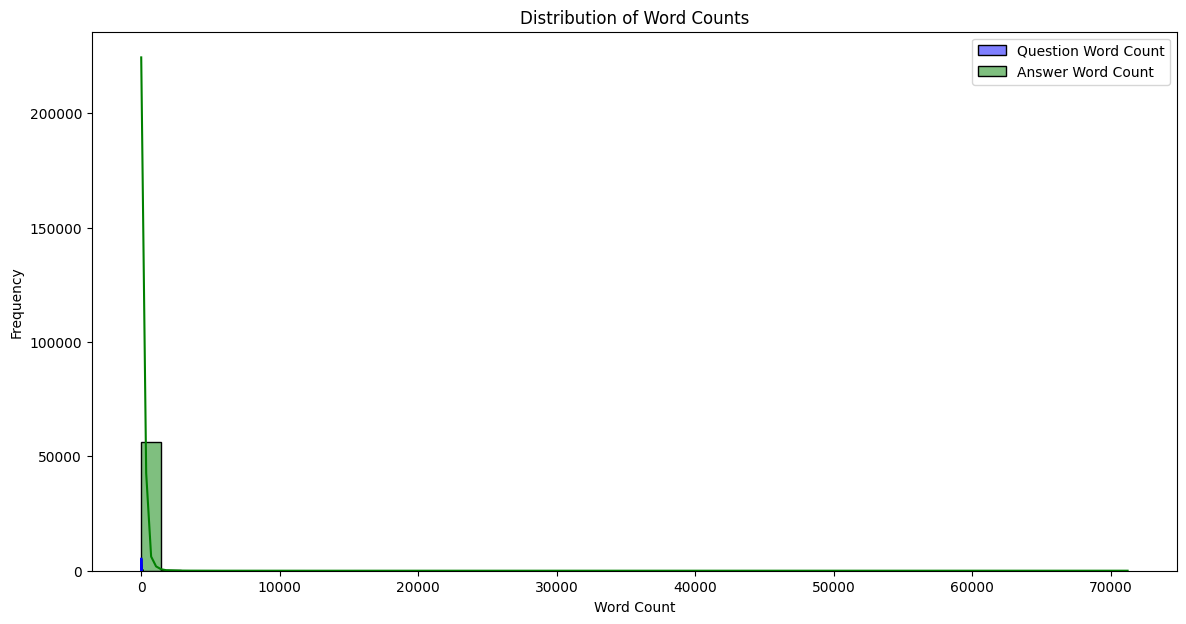

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate word counts
data['question_word_count'] = data['question'].apply(lambda x: len(x.split()))
data['answer_word_count'] = data['answer'].apply(lambda x: len(x.split()))


plt.figure(figsize=(14,7))
sns.histplot(data['question_word_count'], bins=50, kde=True, color='blue', label='Question Word Count')
sns.histplot(data['answer_word_count'], bins=50, kde=True, color='green', label='Answer Word Count')
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()


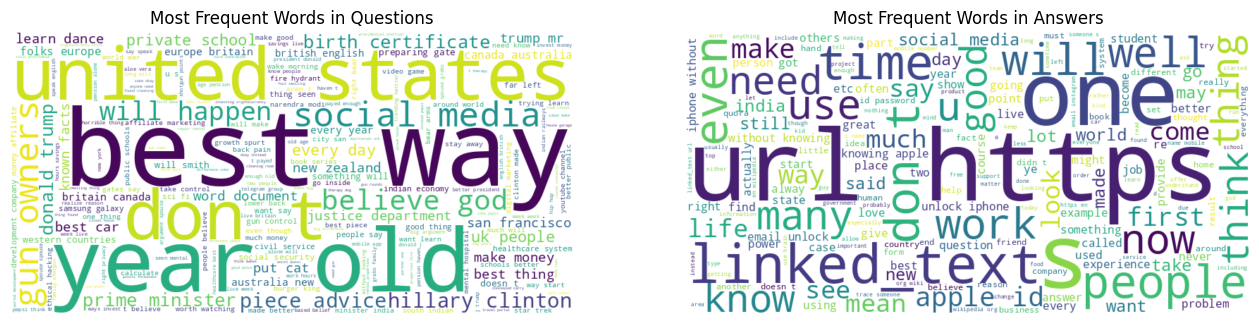

In [14]:
#Most used words
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
question_words = ' '.join(data['question']).lower().split()
answer_words = ' '.join(data['answer']).lower().split()

question_words = [word for word in question_words if word not in stopwords]
answer_words = [word for word in answer_words if word not in stopwords]

question_word_freq = Counter(question_words).most_common(20)
answer_word_freq = Counter(answer_words).most_common(20)


question_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(question_words))
answer_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(answer_words))

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(question_wordcloud, interpolation='bilinear')
plt.title('Most Frequent Words in Questions')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(answer_wordcloud, interpolation='bilinear')
plt.title('Most Frequent Words in Answers')
plt.axis('off')
plt.show()


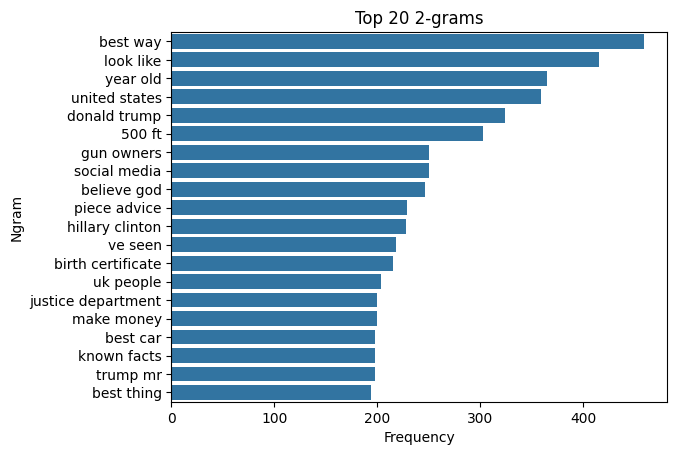

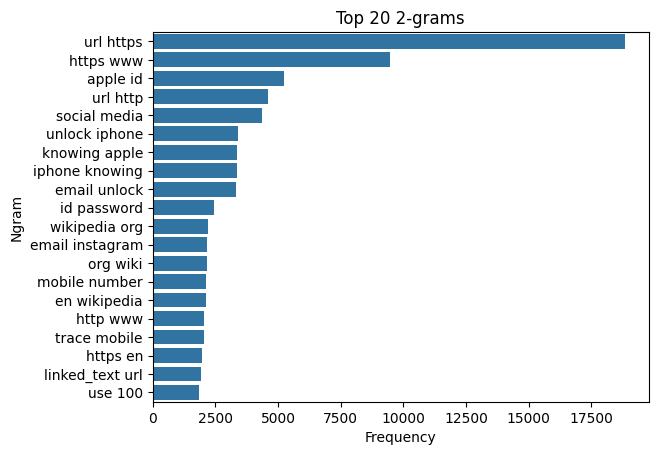

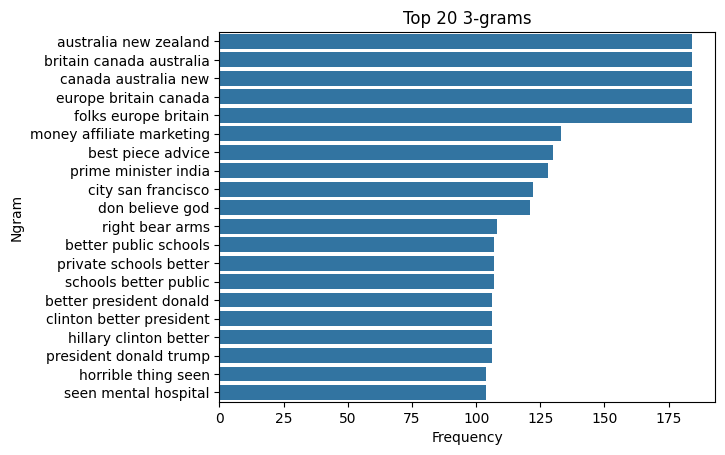

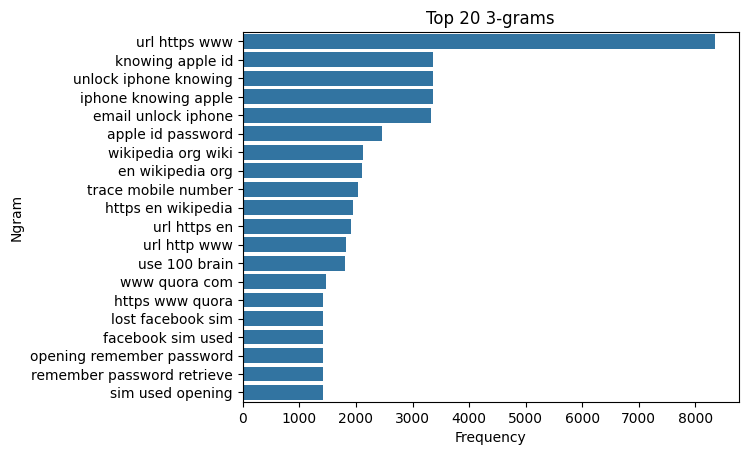

In [17]:
#N gram analysis
from sklearn.feature_extraction.text import CountVectorizer

def plot_ngrams(text_data, n=2, top_k=20):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = vectorizer.fit_transform(text_data)
    ngram_counts = ngrams.sum(axis=0).A1
    ngram_vocab = vectorizer.get_feature_names_out()
    ngram_freq = Counter(dict(zip(ngram_vocab, ngram_counts)))
    common_ngrams = ngram_freq.most_common(top_k)

    ngram_df = pd.DataFrame(common_ngrams, columns=['Ngram', 'Frequency'])
    sns.barplot(data=ngram_df, x='Frequency', y='Ngram')
    plt.title(f'Top {top_k} {n}-grams')
    plt.show()

# Plot bigrams and trigrams
plot_ngrams(data['question'], n=2, top_k=20)
plot_ngrams(data['answer'], n=2, top_k=20)
plot_ngrams(data['question'], n=3, top_k=20)
plot_ngrams(data['answer'], n=3, top_k=20)


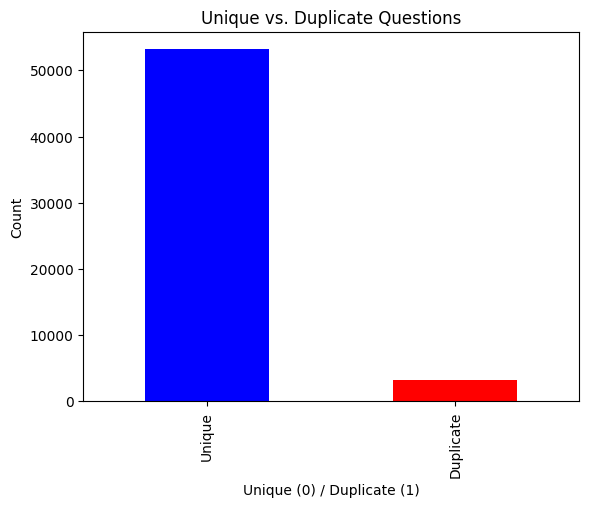

In [19]:
# Check for duplicate questions
data['question_duplicate'] = data.duplicated('question')

# Plot unique vs. duplicate
data['question_duplicate'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Unique vs. Duplicate Questions')
plt.xlabel('Unique (0) / Duplicate (1)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Unique', 'Duplicate'])
plt.show()


#Cleaning and Pre Processing

In [21]:

data.drop_duplicates(inplace=True)

data.dropna(inplace=True)


import re

def clean_text(text):

    if not isinstance(text, str):
        return ''
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.strip().lower()

data['processed_question1'] = data['question'].apply(clean_text)
data['processed_answer1'] = data['answer'].apply(clean_text)


In [22]:
data

,question,answer,question_word_count,answer_word_count,question_char_count,answer_char_count,question_duplicate,processed_question1,processed_answer1
0,Why whenever I get in the shower my girlfriend...,Isn’t it awful? You would swear that there was...,12,15,60,81,False,why whenever i get in the shower my girlfriend...,isnt it awful you would swear that there wasnt...
1,"What is a proxy, and how can I use one?",A proxy server is a system or router that prov...,10,286,39,1678,False,what is a proxy and how can i use one,a proxy server is a system or router that prov...
2,"What song has the lyrics ""someone left the cak...",MacArthur's Park\n,13,2,65,17,False,what song has the lyrics someone left the cake...,macarthurs park
3,I am the owner of an adult website called http...,Don't let apps that are liers put adds on your...,24,117,144,607,False,i am the owner of an adult website called http...,dont let apps that are liers put adds on your ...
4,Does the Bible mention anything about a place ...,St. John in the book of Revelation mentions an...,12,31,72,187,False,does the bible mention anything about a place ...,st john in the book of revelation mentions an ...
...,...,...,...,...,...,...,...,...,...
56397,"Alexandria Ocasio-Cortez said ""Going by track ...","I think she’s right, one is a homosexual with ...",33,29,184,153,True,alexandria ocasiocortez said going by track re...,i think shes right one is a homosexual with no...
56398,Is becoming a doctor financially worth it?,Yes if you want to help people and eliminate p...,7,115,42,624,True,is becoming a doctor financially worth it,yes if you want to help people and eliminate p...
56399,Where can one find the best biryani in bangalore?,Biryani crafts.These guys will give proper aut...,9,11,49,81,True,where can one find the best biryani in bangalore,biryani craftsthese guys will give proper auth...
56400,Which smartphone is best for middle class people?,Oneplus nord\n[LINKED_TEXT: https://latesttech...,8,6,49,186,True,which smartphone is best for middle class people,oneplus nord\nlinkedtext httpslatesttechgadget...


In [23]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]    # Remove stop words and lemmatize
    return ' '.join(tokens)


data['processed_question2'] = data['processed_question1'].apply(preprocess_text)
data['processed_answer2'] = data['processed_answer1'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [24]:
data

,question,answer,question_word_count,answer_word_count,question_char_count,answer_char_count,question_duplicate,processed_question1,processed_answer1,processed_question2,processed_answer2
0,Why whenever I get in the shower my girlfriend...,Isn’t it awful? You would swear that there was...,12,15,60,81,False,why whenever i get in the shower my girlfriend...,isnt it awful you would swear that there wasnt...,whenever get shower girlfriend want join,isnt awful would swear wasnt enough hot water ...
1,"What is a proxy, and how can I use one?",A proxy server is a system or router that prov...,10,286,39,1678,False,what is a proxy and how can i use one,a proxy server is a system or router that prov...,proxy use one,proxy server system router provides gateway us...
2,"What song has the lyrics ""someone left the cak...",MacArthur's Park\n,13,2,65,17,False,what song has the lyrics someone left the cake...,macarthurs park,song lyric someone left cake rain,macarthur park
3,I am the owner of an adult website called http...,Don't let apps that are liers put adds on your...,24,117,144,607,False,i am the owner of an adult website called http...,dont let apps that are liers put adds on your ...,owner adult website called httpsmatureanallove...,dont let apps liers put add site like one say ...
4,Does the Bible mention anything about a place ...,St. John in the book of Revelation mentions an...,12,31,72,187,False,does the bible mention anything about a place ...,st john in the book of revelation mentions an ...,bible mention anything place heaven hell,st john book revelation mention address schola...
...,...,...,...,...,...,...,...,...,...,...,...
56397,"Alexandria Ocasio-Cortez said ""Going by track ...","I think she’s right, one is a homosexual with ...",33,29,184,153,True,alexandria ocasiocortez said going by track re...,i think shes right one is a homosexual with no...,alexandria ocasiocortez said going track recor...,think shes right one homosexual interest woman...
56398,Is becoming a doctor financially worth it?,Yes if you want to help people and eliminate p...,7,115,42,624,True,is becoming a doctor financially worth it,yes if you want to help people and eliminate p...,becoming doctor financially worth,yes want help people eliminate pain life love ...
56399,Where can one find the best biryani in bangalore?,Biryani crafts.These guys will give proper aut...,9,11,49,81,True,where can one find the best biryani in bangalore,biryani craftsthese guys will give proper auth...,one find best biryani bangalore,biryani craftsthese guy give proper authentic ...
56400,Which smartphone is best for middle class people?,Oneplus nord\n[LINKED_TEXT: https://latesttech...,8,6,49,186,True,which smartphone is best for middle class people,oneplus nord\nlinkedtext httpslatesttechgadget...,smartphone best middle class people,oneplus nord linkedtext httpslatesttechgadgets...


#Model Training and Evaluation

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class QADataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

labels = [0 if q1 == q2 else 1 for q1, q2 in zip(data['question_processed2'], data['answer_processed2'])]

# For Avoiding RAM memory issue
batch_size = 1000
encodings = {'input_ids': [], 'attention_mask': []}

for i in range(0, len(data), batch_size):
    batch_encodings = tokenizer(data['question_processed2'][i:i+batch_size].tolist(),
                                data['answer_processed2'][i:i+batch_size].tolist(),
                                truncation=True, padding=True, max_length=512)
    encodings['input_ids'].extend(batch_encodings['input_ids'])
    encodings['attention_mask'].extend(batch_encodings['attention_mask'])

train_dataset = QADataset(encodings, labels)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

model = BertForSequenceClassification.from_pretrained('bert-base-uncased').to('cuda')

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    data_collator=data_collator,
    tokenizer=tokenizer,
)

trainer.train()

In [ ]:
trainer.evaluate()

In [ ]:
trainer.save_model("./qa_model_bert")# similarly for T5 and GPT